<a href="https://colab.research.google.com/github/C23-PC735-Bangkit-Capstone/Machine-Learning-Model/blob/main/ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow_decision_forests

In [ ]:
pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

## Normal Operation Data

In [ ]:
#untuk membaca data normal operation yang akan di cleaning

df_normal = pd.read_csv('/content/drive/MyDrive/SOON-pEMP/Data/01 - m1_half_shaft_speed_no_mechanical_load.csv')

In [ ]:
#untuk mengetahui jumlah baris dan kolom data

df_normal.shape

(107346, 4)

In [ ]:
#untuk mengambil beberapa data paling atas

df_normal.head()

,Timestamp,AccX,AccY,AccZ
0,2141864,3624,-567,17452
1,2143688,-649,-688,16899
2,2145492,-21,-66,14555
3,2147308,-1207,923,12459
4,2149108,208,-16,14951


In [ ]:
#untuk mengetahui info dari tabel yang ada seperti nama kolom, tipe data, jumlah data yg non-null

df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107346 entries, 0 to 107345
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Timestamp  107346 non-null  int64
 1   AccX       107346 non-null  int64
 2   AccY       107346 non-null  int64
 3   AccZ       107346 non-null  int64
dtypes: int64(4)
memory usage: 3.3 MB


In [ ]:
#untuk menghilangkan data yang terduplikat pada kolom Timestamp

df_normal.drop_duplicates(subset=['Timestamp'])

,Timestamp,AccX,AccY,AccZ
0,2141864,3624,-567,17452
1,2143688,-649,-688,16899
2,2145492,-21,-66,14555
3,2147308,-1207,923,12459
4,2149108,208,-16,14951
...,...,...,...,...
107341,203397756,2442,-652,14607
107342,203399644,3780,-53,12611
107343,203401552,-1164,-1501,19707
107344,203403460,-2316,-1704,13083


In [ ]:
#untuk menambahkan kolom Category

df_normal['Category'] = 'Normal operation'

In [ ]:
#untuk mengubah tipe data kolom Category menjadi string

df_normal['Category'] = df_normal['Category'].astype('string')

In [ ]:
df_normal.head()

,Timestamp,AccX,AccY,AccZ,Category
0,2141864,3624,-567,17452,Normal operation
1,2143688,-649,-688,16899,Normal operation
2,2145492,-21,-66,14555,Normal operation
3,2147308,-1207,923,12459,Normal operation
4,2149108,208,-16,14951,Normal operation


In [ ]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107346 entries, 0 to 107345
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  107346 non-null  int64 
 1   AccX       107346 non-null  int64 
 2   AccY       107346 non-null  int64 
 3   AccZ       107346 non-null  int64 
 4   Category   107346 non-null  string
dtypes: int64(4), string(1)
memory usage: 4.1 MB


In [ ]:
#untuk menyimpan data yang sudah dicleaning menjadi csv
df_normal.to_csv('/content/drive/MyDrive/SOON-pEMP/Data/Normal_operation_clean_data.csv', index=False)

## **Mechanical Fault Data**

In [ ]:
df_fault = pd.read_csv('/content/drive/MyDrive/SOON-pEMP/Data/03 - m1_mechanically_imbalanced_half_speed.csv')

In [ ]:
df_fault.shape

(100514, 4)

In [ ]:
df_fault.head()

,Timestamp,AccX,AccY,AccZ
0,2648,-90,-980,15524
1,4344,-162,734,14627
2,6168,1197,1265,16120
3,7960,1638,676,14558
4,9764,357,-845,15319


In [ ]:
df_fault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Timestamp  100514 non-null  int64
 1   AccX       100514 non-null  int64
 2   AccY       100514 non-null  int64
 3   AccZ       100514 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
df_fault.drop_duplicates(subset=['Timestamp'])

,Timestamp,AccX,AccY,AccZ
0,2648,-90,-980,15524
1,4344,-162,734,14627
2,6168,1197,1265,16120
3,7960,1638,676,14558
4,9764,357,-845,15319
...,...,...,...,...
100509,188787668,-1982,-1018,16996
100510,188789572,-2164,-1604,17077
100511,188791436,-3,-665,17071
100512,188793324,1228,361,17367


In [ ]:
df_fault['Category'] = 'Mechanical fault'

In [ ]:
df_fault.head()

,Timestamp,AccX,AccY,AccZ,Category
0,2648,-90,-980,15524,Mechanical fault
1,4344,-162,734,14627,Mechanical fault
2,6168,1197,1265,16120,Mechanical fault
3,7960,1638,676,14558,Mechanical fault
4,9764,357,-845,15319,Mechanical fault


In [ ]:
df_fault.dtypes

Timestamp     int64
AccX          int64
AccY          int64
AccZ          int64
Category     object
dtype: object

In [ ]:
df_fault['Category'] = df_fault['Category'].astype('string')

In [ ]:
df_fault.dtypes

Timestamp     int64
AccX          int64
AccY          int64
AccZ          int64
Category     string
dtype: object

In [ ]:
df_fault.shape

(100514, 5)

In [ ]:
#untuk menyimpan data yang sudah dicleaning menjadi csv
df_fault.to_csv('/content/drive/MyDrive/SOON-pEMP/Data/mechanical_fault_operation_clean_data.csv', index=False)

## Combining the dataset

In [ ]:
df_vibration = pd.concat([df_normal, df_fault], ignore_index=True)

In [ ]:
df_vibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207860 entries, 0 to 207859
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  207860 non-null  int64 
 1   AccX       207860 non-null  int64 
 2   AccY       207860 non-null  int64 
 3   AccZ       207860 non-null  int64 
 4   Category   207860 non-null  string
dtypes: int64(4), string(1)
memory usage: 7.9 MB


In [ ]:
df_vibration = df_vibration.sort_values(by='Timestamp', ignore_index = True)

In [ ]:
df_vibration.head()

,Timestamp,AccX,AccY,AccZ,Category
0,2648,-90,-980,15524,Mechanical fault
1,4344,-162,734,14627,Mechanical fault
2,6168,1197,1265,16120,Mechanical fault
3,7960,1638,676,14558,Mechanical fault
4,9764,357,-845,15319,Mechanical fault


In [ ]:
df_vibration.tail()

,Timestamp,AccX,AccY,AccZ,Category
207855,203397756,2442,-652,14607,Normal operation
207856,203399644,3780,-53,12611,Normal operation
207857,203401552,-1164,-1501,19707,Normal operation
207858,203403460,-2316,-1704,13083,Normal operation
207859,203405364,-2731,-555,19820,Normal operation


In [ ]:
#untuk menyimpan data yang sudah dicleaning menjadi csv
df_vibration.to_csv('/content/drive/MyDrive/SOON-pEMP/Data/vibration_data.csv', index=False)

Siap-siap next week ngerjain EDA sama modeling logistic regression ya!

#EDA

## Korelasi

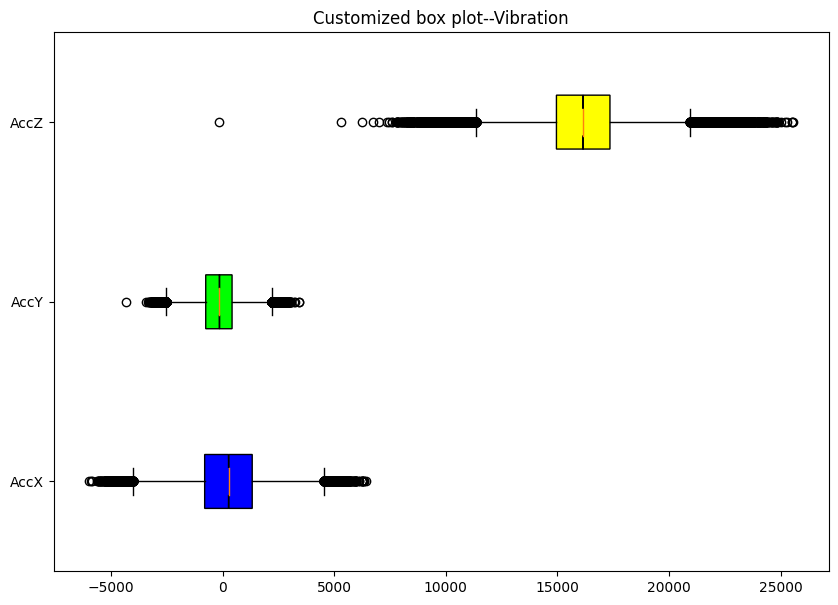

In [ ]:
#Membuat boxplot

# Creating dataset
data_1 = df_vibration['AccX']
data_2 = df_vibration['AccY']
data_3 = df_vibration['AccZ']
data = [data_1, data_2, data_3]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
     
# x-axis labels
ax.set_yticklabels(['AccX', 'AccY',
                    'AccZ'])
 
# Adding title
plt.title("Customized box plot--Vibration")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

In [ ]:
#Mencai tau banyak baris & kolom
df_vibration.shape

(207860, 5)

In [ ]:
#Cek ulang data null dan type datanya
df_vibration.info()
df_vibration['Category'] = df_vibration['Category'].astype('string')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207860 entries, 0 to 207859
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  207860 non-null  int64 
 1   AccX       207860 non-null  int64 
 2   AccY       207860 non-null  int64 
 3   AccZ       207860 non-null  int64 
 4   Category   207860 non-null  string
dtypes: int64(4), string(1)
memory usage: 7.9 MB


In [ ]:
#Statdes
df_vibration.describe().round(3)

,Timestamp,AccX,AccY,AccZ
count,2.078600e+05,207860.000,207860.000,207860.000
mean,9.821641e+07,265.671,-166.490,16170.474
std,5.658955e+07,1559.650,943.189,1978.339
min,2.648000e+03,-5986.000,-4326.000,-167.000
25%,4.927670e+07,-802.000,-754.000,14959.000
50%,9.769103e+07,271.000,-138.000,16151.000
75%,1.468783e+08,1329.000,426.000,17357.000
max,2.034054e+08,6406.000,3424.000,25580.000


In [ ]:
#Analsis korelasi dengan melihat skor korelasi
df_vibration.corr().round(3)

<ipython-input-35-f467afb2f4cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_vibration.corr().round(3)


,Timestamp,AccX,AccY,AccZ
Timestamp,1.000,0.000,-0.002,0.002
AccX,0.000,1.000,0.388,-0.338
AccY,-0.002,0.388,1.000,-0.038
AccZ,0.002,-0.338,-0.038,1.000


<ipython-input-36-0375f7229ff3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_vibration.corr().round(3)


Text(0.5, 1.0, 'Matriks Korelasi antar Variabel')

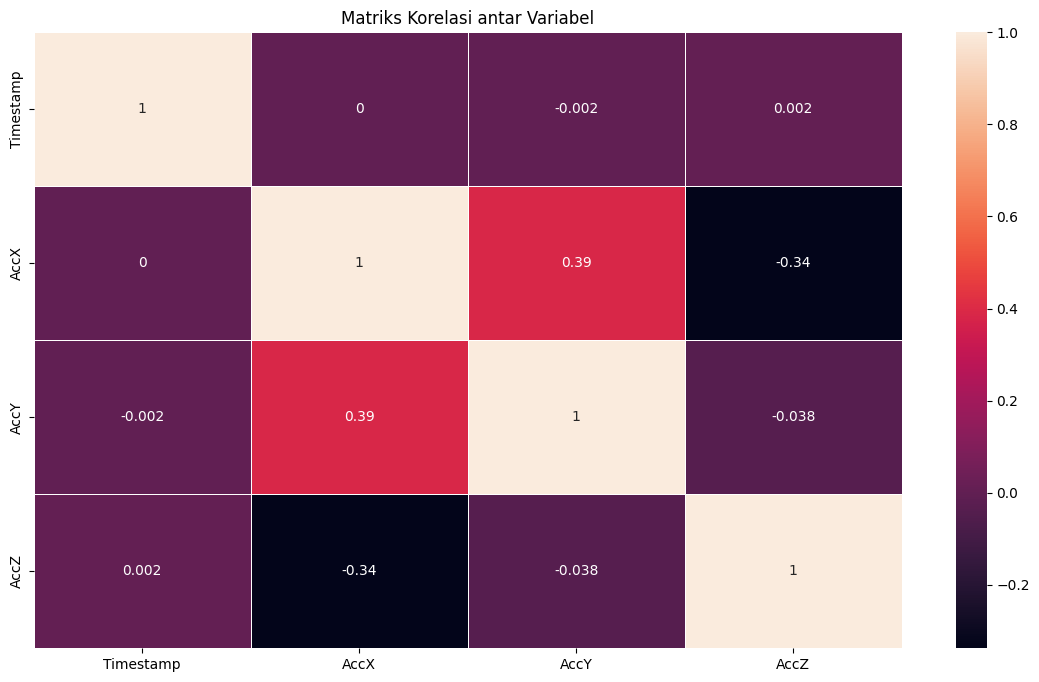

In [ ]:
#Visualisasi Matrik Korelasi

plt.figure(figsize = [14,8])
corr = df_vibration.corr().round(3)
sns.heatmap(corr,linewidths=.5, annot = True)
plt.title("Matriks Korelasi antar Variabel")

In [ ]:
df_vibration['Timestamp'] =  pd.to_datetime(df_vibration['Timestamp'], format='%Y-%m-%d %H:%M:%S' ,utc='True')
df_vibration.head()

#Ternyata data bkn timeseries, krn diambil dlm 1 waktu

,Timestamp,AccX,AccY,AccZ,Category
0,1970-01-01 00:00:00.000002648+00:00,-90,-980,15524,Mechanical fault
1,1970-01-01 00:00:00.000004344+00:00,-162,734,14627,Mechanical fault
2,1970-01-01 00:00:00.000006168+00:00,1197,1265,16120,Mechanical fault
3,1970-01-01 00:00:00.000007960+00:00,1638,676,14558,Mechanical fault
4,1970-01-01 00:00:00.000009764+00:00,357,-845,15319,Mechanical fault


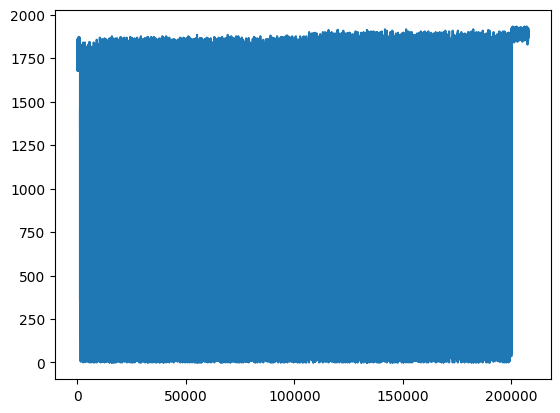

In [ ]:
#Cek apakah data time series (memperkuat bukti sebelumnya)
import matplotlib.pyplot as plt
d = df_vibration['Timestamp'].diff()
plt.plot(d[1:])

In [ ]:
#locate indices of MF and MFP and NO
NO_idx = df_vibration.loc[df_vibration['Category'] == 'Normal operation'].index
MF_idx = df_vibration.loc[df_vibration['Category'] == 'Mechanical fault'].index
MFP_idx = df_vibration.loc[df_vibration['Category'] == 'Mechanical fault (shaft misalignment) and noise present'].index

bef_MF_idx = list()
for j in MF_idx:
    for i in range(24*60):
        bef_MF_idx.append(j-i)

bef_MF_idx.sort()

#locate timestamps of Mechanical Fault:
MF_timestamps = df_vibration.loc[MF_idx,'Timestamp']
print(MF_timestamps)

0        1970-01-01 00:00:00.000002648+00:00
1        1970-01-01 00:00:00.000004344+00:00
2        1970-01-01 00:00:00.000006168+00:00
3        1970-01-01 00:00:00.000007960+00:00
4        1970-01-01 00:00:00.000009764+00:00
                         ...                
200130   1970-01-01 00:00:00.188787668+00:00
200132   1970-01-01 00:00:00.188789572+00:00
200134   1970-01-01 00:00:00.188791436+00:00
200136   1970-01-01 00:00:00.188793324+00:00
200138   1970-01-01 00:00:00.188795208+00:00
Name: Timestamp, Length: 100514, dtype: datetime64[ns, UTC]


## Uji Normalitas

In [ ]:
df_vibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207860 entries, 0 to 207859
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   Timestamp  207860 non-null  datetime64[ns, UTC]
 1   AccX       207860 non-null  int64              
 2   AccY       207860 non-null  int64              
 3   AccZ       207860 non-null  int64              
 4   Category   207860 non-null  string             
dtypes: datetime64[ns, UTC](1), int64(3), string(1)
memory usage: 7.9 MB


In [ ]:
df_normalitas = pd.concat([df_vibration['AccX'], df_vibration['AccY'], df_vibration['AccZ']], axis=1)

In [ ]:
df_normalitas.head()

,AccX,AccY,AccZ
0,-90,-980,15524
1,-162,734,14627
2,1197,1265,16120
3,1638,676,14558
4,357,-845,15319


In [ ]:
# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(df_normalitas)

# Print the test results
print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"p-value: {p_value}")

# Interpret the test results
alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed (failed to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")


Shapiro-Wilk test statistic: 0.7602698802947998
p-value: 0.0
The data is not normally distributed (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Plot

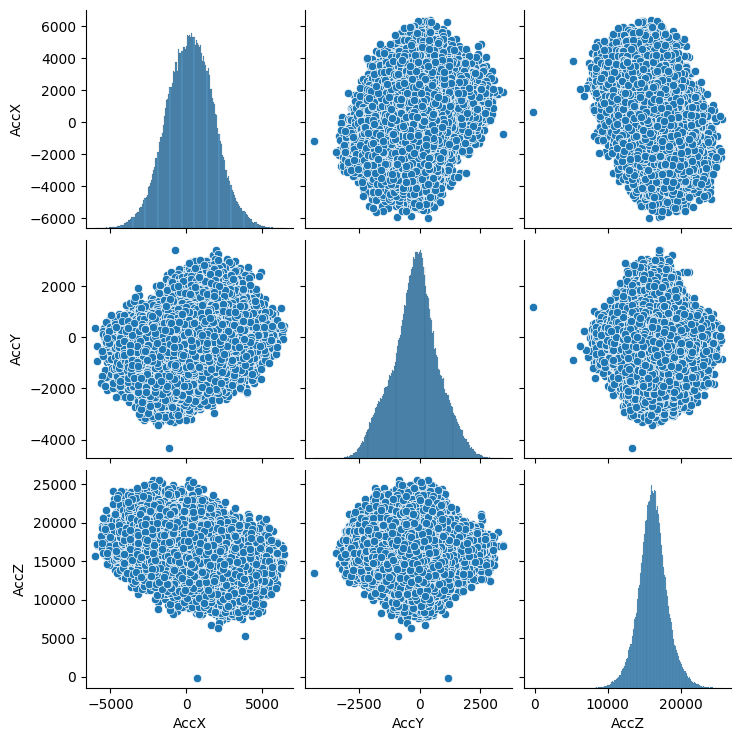

In [ ]:
sns.pairplot(df_vibration)

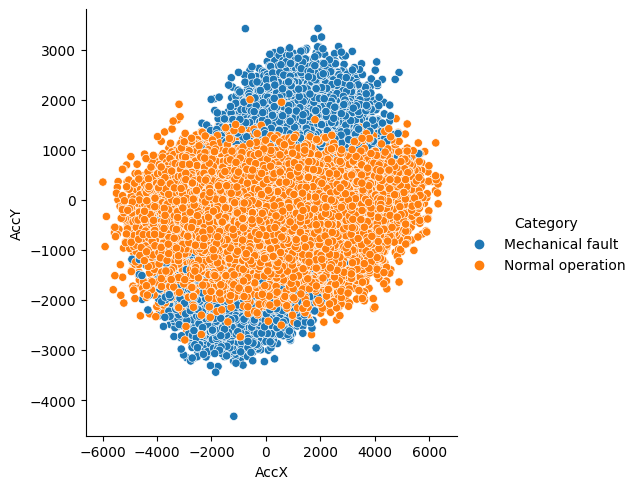

In [ ]:
sns.relplot(x= 'AccX', y='AccY', hue='Category', data=df_vibration)

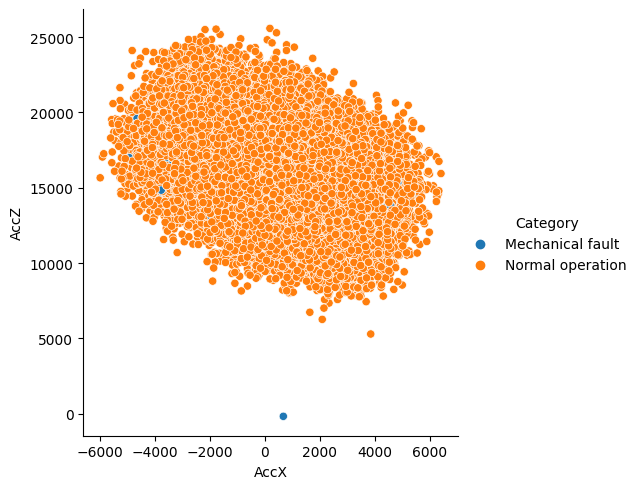

In [ ]:
sns.relplot(x= 'AccX', y='AccZ', hue='Category', data=df_vibration)

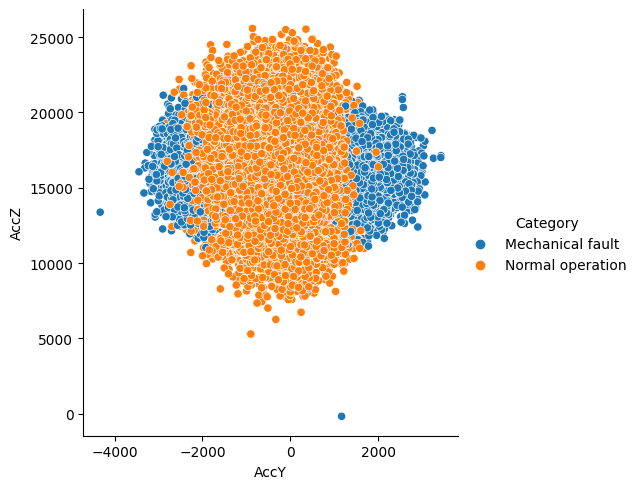

In [ ]:
sns.relplot(x= 'AccY', y='AccZ', hue='Category', data=df_vibration)

# Modeling

## Random Forest

In [ ]:
tf.random.set_seed(22)

In [ ]:
df_vibration['Category'].value_counts()

Normal operation    107346
Mechanical fault    100514
Name: Category, dtype: Int64

In [ ]:
data_1 = df_vibration.drop(['Timestamp'], axis = 1)

In [ ]:
# Encode the categorical labels as integers.
#
# Details:
# This stage is necessary if your classification label is represented as a
# string since Keras expects integer classification labels.
# When using `pd_dataframe_to_tf_dataset` (see below), this step can be skipped.

# Name of the label column.
label = "Category"

classes = data_1[label].unique().tolist()
print(f"Label classes: {classes}")

data_1[label] = data_1[label].map(classes.index)

Label classes: ['Mechanical fault', 'Normal operation']


**0 = Mechanical Fault**

**1 = Normal Operation**

In [ ]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.25):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(data_1)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

155964 examples in training, 51896 examples for testing.


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [ ]:
# Specify the model.
random_forest = tfdf.keras.RandomForestModel(verbose=1, hyperparameter_template="benchmark_rank1")

# Train the model.
random_forest.fit(train_ds)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp8zzi1bms as temporary training directory
Reading training dataset...


Training dataset read in 0:00:02.300711. Found 155964 examples.
Training model...
Model trained in 0:03:57.257834
Compiling model...


Model compiled.


In [ ]:
random_forest.compile(metrics=["accuracy"])
evaluation = random_forest.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

52/52 [==============================] - 17s 320ms/step - loss: 0.0000e+00 - accuracy: 0.7756

loss: 0.0000
accuracy: 0.7756


In [ ]:
tfdf.model_plotter.plot_model_in_colab(random_forest, tree_idx=0, max_depth=3)

## Decision Tree

In [ ]:
# Specify the model.
decision_tree = tfdf.keras.GradientBoostedTreesModel(verbose=1, hyperparameter_template="benchmark_rank1")

# Train the model.
decision_tree.fit(train_ds)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpsaefk0vn as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.149860. Found 155964 examples.
Training model...
Model trained in 0:00:56.500701
Compiling model...
Model compiled.


In [ ]:
decision_tree.compile(metrics=["accuracy"])
evaluation = decision_tree.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

52/52 [==============================] - 2s 41ms/step - loss: 0.0000e+00 - accuracy: 0.7775

loss: 0.0000
accuracy: 0.7775


## Logistic Regression

In [ ]:
x_train, y_train = train_ds_pd.iloc[:, 0:-1], train_ds_pd.iloc[:, 3]
x_test, y_test = test_ds_pd.iloc[:, 0:-1], test_ds_pd.iloc[:, 3]

In [ ]:
x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

In [ ]:
class Normalize(tf.Module):
  def __init__(self, x):
    # Initialize the mean and standard deviation for normalization
    self.mean = tf.Variable(tf.math.reduce_mean(x, axis=0))
    self.std = tf.Variable(tf.math.reduce_std(x, axis=0))

  def norm(self, x):
    # Normalize the input
    return (x - self.mean)/self.std

  def unnorm(self, x):
    # Unnormalize the input
    return (x * self.std) + self.mean

norm_x = Normalize(x_train)
x_train_norm, x_test_norm = norm_x.norm(x_train), norm_x.norm(x_test)

In [ ]:
def log_loss(y_pred, y):
  # Compute the log loss function
  ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(ce)

In [ ]:
class LogisticRegression(tf.Module):

  def __init__(self):
    self.built = False

  def __call__(self, x, train=True):
    # Initialize the model parameters on the first call
    if not self.built:
      # Randomly generate the weights and the bias term
      rand_w = tf.random.uniform(shape=[x.shape[-1], 1], seed=22)
      rand_b = tf.random.uniform(shape=[], seed=22)
      self.w = tf.Variable(rand_w)
      self.b = tf.Variable(rand_b)
      self.built = True
    # Compute the model output
    z = tf.add(tf.matmul(x, self.w), self.b)
    z = tf.squeeze(z, axis=1)
    if train:
      return z
    return tf.sigmoid(z)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
# To validate, make sure the untrained model outputs values in the range of (0, 1) for a small subset of the 
# training data.

y_pred = log_reg(x_train_norm[:5], train=False)
y_pred.numpy()

array([0.44655982, 0.6085635 , 0.8264902 , 0.61538416, 0.20115012],
      dtype=float32)

In [ ]:
def predict_class(y_pred, thresh=0.5):
  # Return a tensor with  `1` if `y_pred` > `0.5`, and `0` otherwise
  return tf.cast(y_pred > thresh, tf.float32)

def accuracy(y_pred, y):
  # Return the proportion of matches between `y_pred` and `y`
  y_pred = tf.math.sigmoid(y_pred)
  y_pred_class = predict_class(y_pred)
  check_equal = tf.cast(y_pred_class == y,tf.float32)
  acc_val = tf.reduce_mean(check_equal)
  return acc_val

In [ ]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test))
test_dataset = test_dataset.shuffle(buffer_size=x_test.shape[0]).batch(batch_size)

In [ ]:
# Set training parameters
epochs = 10
learning_rate = 0.01
train_losses, test_losses = [], []
train_accs, test_accs = [], []

# Set up the training loop and begin training
for epoch in range(epochs):
  batch_losses_train, batch_accs_train = [], []
  batch_losses_test, batch_accs_test = [], []

  # Iterate over the training data
  for x_batch, y_batch in train_dataset:
    with tf.GradientTape() as tape:
      y_pred_batch = log_reg(x_batch)
      batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Update the parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, log_reg.variables)
    for g,v in zip(grads, log_reg.variables):
      v.assign_sub(learning_rate * g)
    # Keep track of batch-level training performance
    batch_losses_train.append(batch_loss)
    batch_accs_train.append(batch_acc)

  # Iterate over the testing data
  for x_batch, y_batch in test_dataset:
    y_pred_batch = log_reg(x_batch)
    batch_loss = log_loss(y_pred_batch, y_batch)
    batch_acc = accuracy(y_pred_batch, y_batch)
    # Keep track of batch-level testing performance
    batch_losses_test.append(batch_loss)
    batch_accs_test.append(batch_acc)

  # Keep track of epoch-level model performance
  train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
  test_loss, test_acc = tf.reduce_mean(batch_losses_test), tf.reduce_mean(batch_accs_test)
  train_losses.append(train_loss)
  train_accs.append(train_acc)
  test_losses.append(test_loss)
  test_accs.append(test_acc)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}")

Epoch: 0, Training log loss: 0.691
Epoch: 10, Training log loss: 0.691
Epoch: 20, Training log loss: 0.691


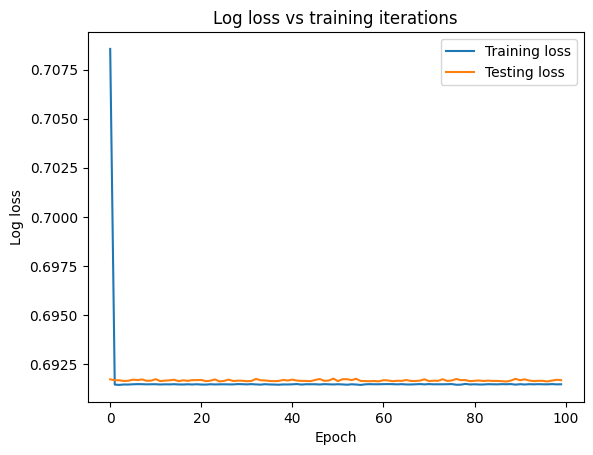

In [ ]:
plt.plot(range(epochs), train_losses, label = "Training loss")
plt.plot(range(epochs), test_losses, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.title("Log loss vs training iterations");

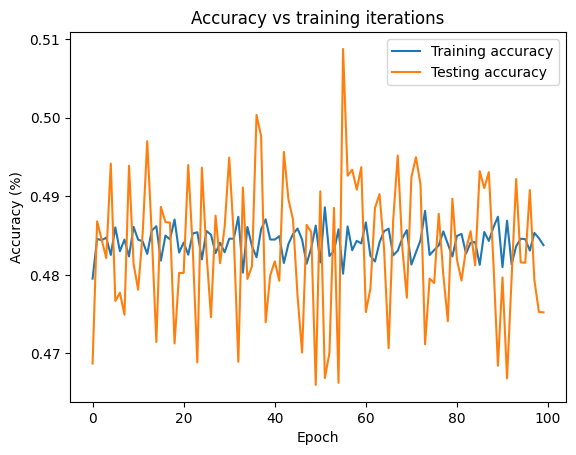

In [ ]:
plt.plot(range(epochs), train_accs, label = "Training accuracy")
plt.plot(range(epochs), test_accs, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs training iterations");

In [ ]:
print(f"Final training log loss: {train_losses[-1]:.3f}")
print(f"Final testing log Loss: {test_losses[-1]:.3f}")

Final training log loss: 0.691
Final testing log Loss: 0.692


In [ ]:
print(f"Final training accuracy: {train_accs[-1]:.3f}")
print(f"Final testing accuracy: {test_accs[-1]:.3f}")

Final training accuracy: 0.484
Final testing accuracy: 0.475
